In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

def get_avaibable_gpus():
    local_device_protos = device_lib.list_local_devices()
    return[x.name for x in local_device_protos if x.device_type == 'GPU']
print(get_avaibable_gpus())

2024-06-04 16:16:45.446920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 16:16:45.447018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 16:16:45.563908: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.15.0'

In [4]:
tf.test.is_built_with_cuda()

True

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

## Data Visualization

In [22]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

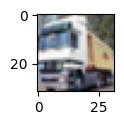

In [23]:
plot_sample(1)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Preprocessing: Scale Image

In [26]:
X_train_scale = X_train / 255
X_test_scale = X_test / 255

In [29]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10)

y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10)

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [34]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
y_train_categorical.shape

(50000, 10)

## Model building and training

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scale, y_train_categorical, epochs = 1)

  48/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1130 - loss: 5.5264

I0000 00:00:1717518872.134092    1397 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717518872.150035    1397 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2733 - loss: 2.1981


W0000 00:00:1717518878.122553    1396 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [40]:
np.argmax(model.predict(X_test_scale)[0])

117/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1717518935.022829    1398 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1717518935.588720    1395 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3

In [41]:
y_test[0]

array([3], dtype=uint8)

In [47]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
        
    return model

In [48]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scale, y_train_categorical, epochs = 1)

2024-06-04 16:39:48.059177: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - accuracy: 0.2759 - loss: 2.1673
1min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scale, y_train_categorical, epochs = 1)

  51/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1341 - loss: 5.6328

W0000 00:00:1717519292.583699    1397 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2775 - loss: 2.2141
9.03 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


W0000 00:00:1717519298.179484    1398 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [50]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scale, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.2735 - loss: 2.2016
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.3957 - loss: 1.6799
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.4394 - loss: 1.5749
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4598 - loss: 1.5208
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.4750 - loss: 1.4727
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.4752 - loss: 1.4550
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4919 - loss: 1.4245
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5001 - loss: 1.4023
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5097 - loss: 1.3681
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 64ms/step - accuracy: 0.5192 - loss: 1.3462
17min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [51]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scale, y_train_categorical, epochs = 10)

Epoch 1/10
  49/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1091 - loss: 6.1227

W0000 00:00:1717520362.596325    1398 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2716 - loss: 2.2561
Epoch 2/10
  51/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3959 - loss: 1.7262

W0000 00:00:1717520368.216235    1398 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3986 - loss: 1.6851
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4282 - loss: 1.6005
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4447 - loss: 1.5438
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4705 - loss: 1.4871
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4782 - loss: 1.4592
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4889 - loss: 1.4351
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4975 - loss: 1.4039
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5019 - loss: 1.3945
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5061 - loss: 1.3806
52.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
